Theta Best: 
[[4.40798986]
 [3.04262046]]
--
Y Prediction: 
[[ 4.40798986]
 [10.49323078]]


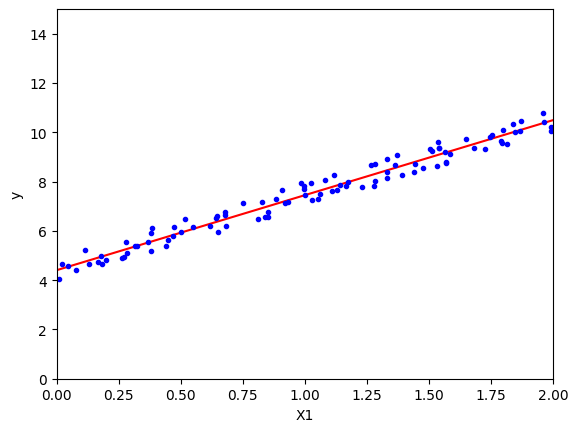

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

#Normal Equation
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Theta Best: ")
print(theta_best)

print('--')

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add xtheta = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print("Y Prediction: ")
print(y_predict)

plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

#Linear Regression with sklearn
lin_reg =  LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
print("Y Prediction: ")
print(lin_reg.predict(X_new))

print('--')

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Theta Best SVD: ")
print(theta_best_svd)

print('--')

print("Pseudoinverse: ")
print(np.linalg.pinv(X_b).dot(y))

Y Prediction: 
[[ 4.40798986]
 [10.49323078]]
--
Theta Best SVD: 
[[4.40798986]
 [3.04262046]]
--
Pseudoinverse: 
[[4.40798986]
 [3.04262046]]


In [6]:
lr = 0.1
n_iterations = 500
m = 100

theta = np.random.randn(2,1)

#Batch Gradient Descent
for i in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - lr * gradients

print("Batch Gradient Theta:")
print(theta)
print('---')

#Stochastic Gradient Descent
epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(epoch * m + i)
        theta = theta - lr * gradients

print("Stochastic Gradient Theta:")
print(theta)
print('---')

#SGD Using Scikit-Learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
print("sklearn Stochastic Gradient Theta:")
print(sgd_reg.intercept_, sgd_reg.coef_)



Batch Gradient Theta:
[[4.40798921]
 [3.042621  ]]
---
Stochastic Gradient Theta:
[[4.42919574]
 [3.03688923]]
---
sklearn Stochastic Gradient Theta:
[4.37869427] [3.06030179]


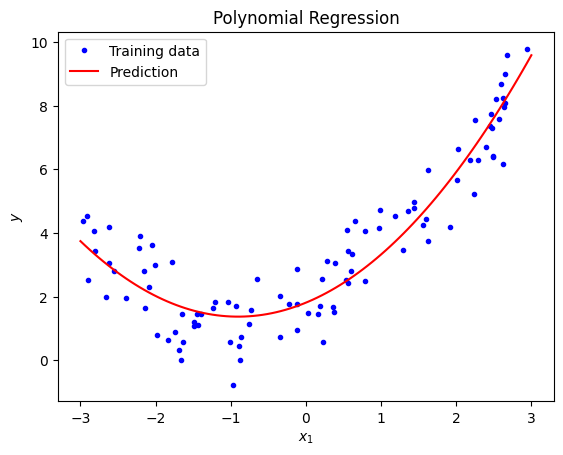

In [7]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

m=100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2+X+2+np.random.randn(m,1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_features.fit(X,y)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_predict = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.", label="Training data")
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend()
plt.title("Polynomial Regression")
plt.show()

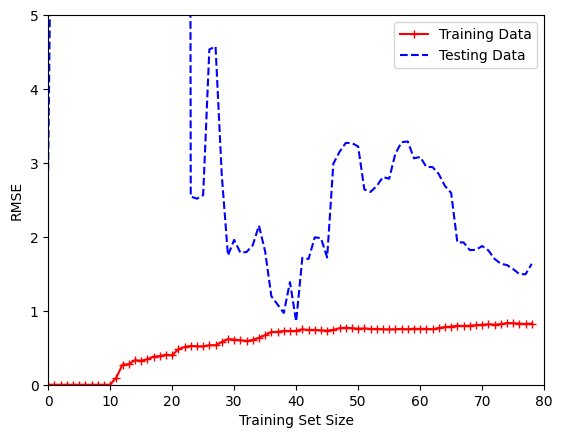

In [8]:
#Learning Curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", label="Training Data")
    plt.plot(np.sqrt(test_errors), "b--", label="Testing Data")
    plt.legend()
    plt.ylabel('RMSE')
    plt.xlabel('Training Set Size')
    plt.axis([0,len(X_train),0,5])

from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(poly_reg, X, y)

In [9]:
#Regularized Linear Models
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
print("SGD Prediction:")
print(sgd_reg.predict([[1.5]]))
print('---')

#Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
print("Ridge Prediction:")
print(ridge_reg.predict([[1.5]]))
print('---')

#Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X,y)
print('Lasso Prediction')
print(lasso_reg.predict([[1.5]]))
print('---')

#Elastic Net
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
en_reg.fit(X,y)
print("Elastic Net Prediction:")
print(en_reg.predict([[1.5]]))

SGD Prediction:
[5.02780762]
---
Ridge Prediction:
[[5.03697069]]
---
Lasso Prediction
[4.9488639]
---
Elastic Net Prediction:
[4.99556578]


Best Epoch:
140
---
Best Model:
SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=None, warm_start=True)
---


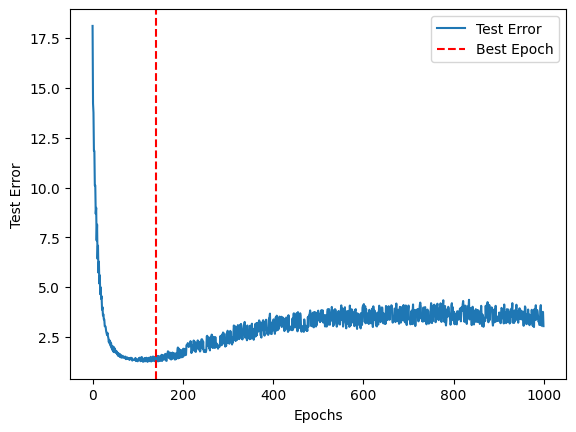

In [10]:
#Early Stopping
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
    ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

min_test_error = float("inf")
best_epoch = None
best_model = None
test_errors = []

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_test_predict = sgd_reg.predict(X_test_poly_scaled)
    test_error = mean_squared_error(y_test, y_test_predict)
    test_errors.append(test_error)
    if test_error < min_test_error:
        min_test_error = test_error
        best_epoch = epoch
        best_model =clone(sgd_reg)

print('Best Epoch:')
print(best_epoch)
print('---')
print('Best Model:')
print(best_model)
print('---')

plt.plot(test_errors, label='Test Error')
plt.axvline(best_epoch, color='r', linestyle='--', label='Best Epoch')
plt.xlabel('Epochs')
plt.ylabel('Test Error')
plt.legend()
plt.show()

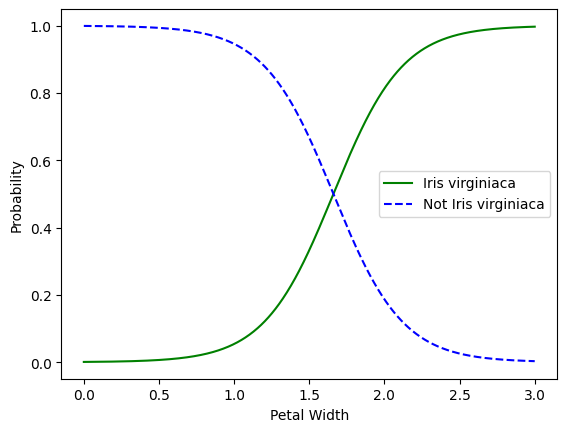

array([False,  True])

In [11]:
#Logistic Regression
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][:,3:]
y = (iris['target']==2)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:,1], "g-", label = "Iris virginiaca")
plt.plot(X_new, y_prob[:,0], "b--", label = "Not Iris virginiaca")
plt.legend()
plt.xlabel('Petal Width')
plt.ylabel('Probability')
plt.show()

log_reg.predict([[1.5], [1.7]])

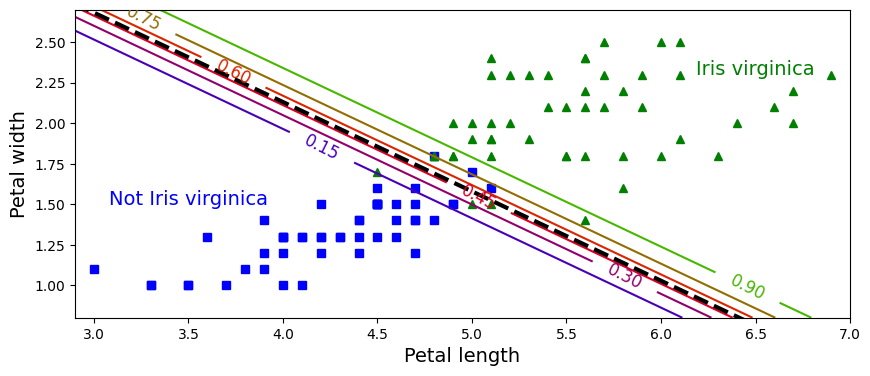

In [12]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int64)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

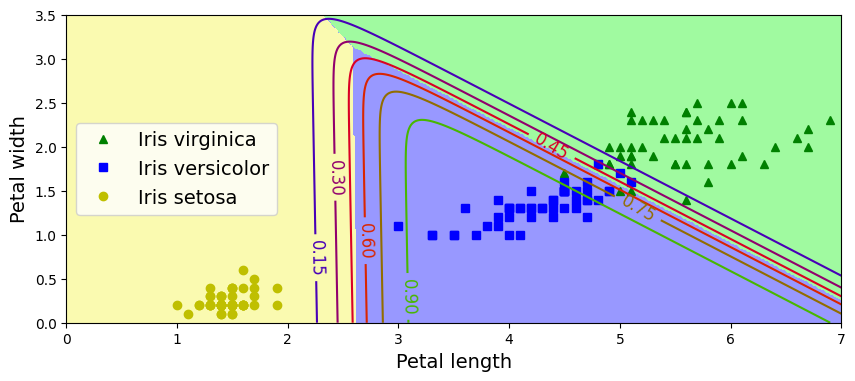

In [13]:
#Softmax Regression
X = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()